In [168]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from xgboost import XGBRegressor, XGBRFRegressor, DMatrix, cv
from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA

%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
from src.pipelines import *

In [170]:
X_TRAIN_PATH = './src/X_final.csv'
Y_TRAIN_PATH = './src/y_train.csv'

X = pd.read_csv(X_TRAIN_PATH)
y = pd.read_csv(Y_TRAIN_PATH)

add_time(X)
add_hour_weekday_month2(X)
add_weekend(X)
add_business_hour(X)
add_siesta(X)
add_holidays_spain(X)
normalize(X)
add_city_weight(X, as_features=True)



add_business_hour: 100%|██████████| 35064/35064 [00:14<00:00, 2433.26it/s]


<IPython.core.display.Javascript object>


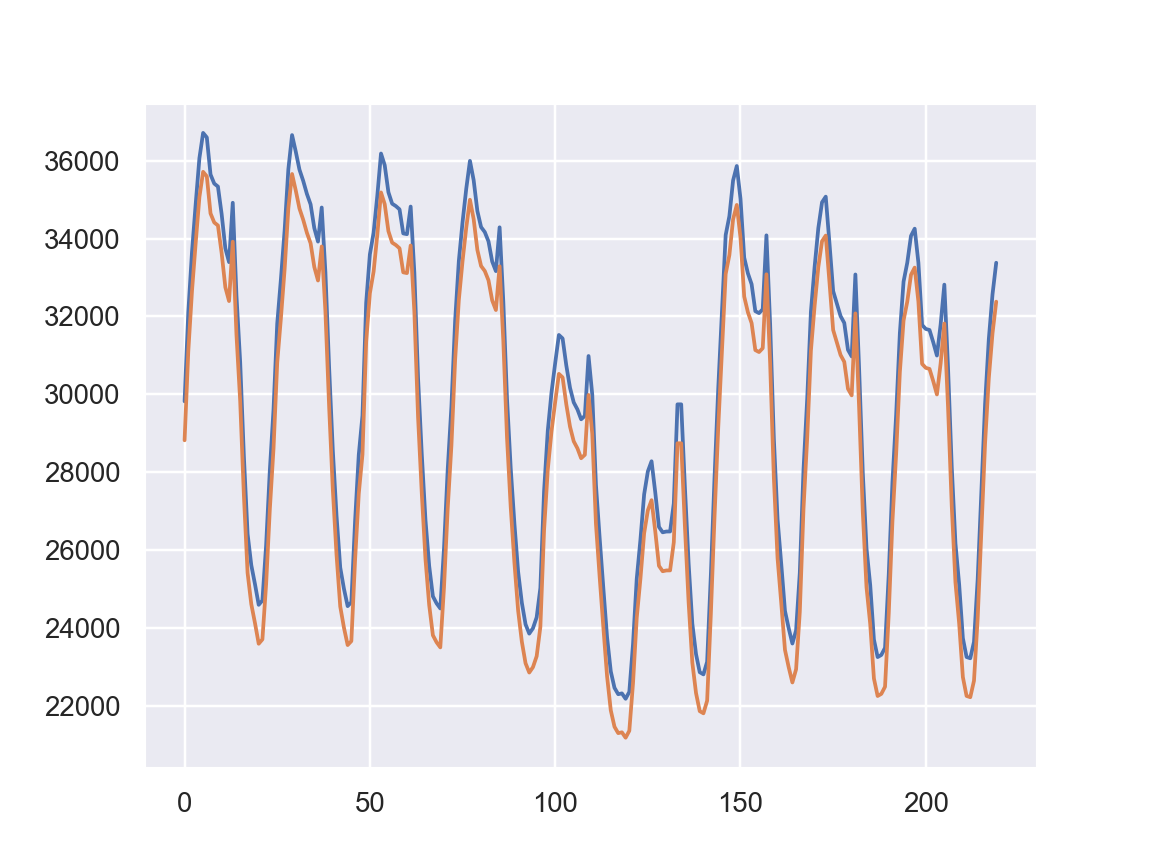

In [171]:
# X_TRAIN_PATH = './src/X_final.csv'
# Y_TRAIN_PATH = './src/y_train.csv'

# X = pd.read_csv(X_TRAIN_PATH)
# y = pd.read_csv(Y_TRAIN_PATH)



X.drop(columns=['ValueDateTimeUTC', 'time', 'date'], inplace=True)
y.drop(columns=['ValueDateTimeUTC'], inplace=True)

# Uncomment for PCA
# pca = PCA(n_components=25)
# pca.fit(X)
# X = pca.transform(X)

plt.plot(y_test.to_numpy()[:220])

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.1, random_state=42, shuffle=False)

X_train.shape
plt.plot(y_test.to_numpy()[:220]-1000)

In [42]:
n_estimators = 999
params = {
    # Parameters that we are going to tune.
    'max_depth':10,
    'min_child_weight': 2,
    'learning_rate':.005,
    'subsample': 2,
    'colsample_bytree': 1,
    # Other parameters
    # 'objective':'reg:linear',
}

In [172]:
n_estimators = 2000
params = {
    # Parameters that we are going to tune.
    'max_depth':10,
    'min_child_weight': 1,
    'learning_rate':.05,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
#     'objective':'reg:squarederror'
#     'objective':'reg:linear',
#     'eval_metric':'mape'
}

xgb_model = XGBRegressor(
    **params,
    n_estimators=n_estimators)
# print(xgb_models)

split_frac = 0.66
X_train = X[:int(X.shape[0]*split_frac)]
X_test = X[int(X.shape[0]*split_frac):]
y_train = y[:int(X.shape[0]*split_frac)]
y_test = y[int(X.shape[0]*split_frac):]

i = 1
score = []


fit = xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=30)


[0]	validation_0-rmse:27466.19531	validation_1-rmse:27781.05078
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 30 rounds.
[1]	validation_0-rmse:26100.67383	validation_1-rmse:26423.44336
[2]	validation_0-rmse:24803.60156	validation_1-rmse:25131.41797
[3]	validation_0-rmse:23571.52930	validation_1-rmse:23908.16406
[4]	validation_0-rmse:22400.91992	validation_1-rmse:22742.63867
[5]	validation_0-rmse:21288.96484	validation_1-rmse:21635.32031
[6]	validation_0-rmse:20232.68750	validation_1-rmse:20584.65430
[7]	validation_0-rmse:19229.40625	validation_1-rmse:19587.72656
[8]	validation_0-rmse:18276.30078	validation_1-rmse:18635.61523
[9]	validation_0-rmse:17370.89062	validation_1-rmse:17736.98438
[10]	validation_0-rmse:16510.78906	validation_1-rmse:16879.24414
[11]	validation_0-rmse:15693.85840	validation_1-rmse:16066.75684
[12]	validation_0-rmse:14917.89356	validation_1-rmse:15294.96680
[13]	v

[128]	validation_0-rmse:311.08685	validation_1-rmse:1152.53308
[129]	validation_0-rmse:308.14014	validation_1-rmse:1151.10901
[130]	validation_0-rmse:304.64423	validation_1-rmse:1150.41064
[131]	validation_0-rmse:302.65759	validation_1-rmse:1149.66956
[132]	validation_0-rmse:300.77530	validation_1-rmse:1148.16968
[133]	validation_0-rmse:297.73801	validation_1-rmse:1146.96167
[134]	validation_0-rmse:295.01743	validation_1-rmse:1147.09228
[135]	validation_0-rmse:292.97134	validation_1-rmse:1146.34290
[136]	validation_0-rmse:290.92471	validation_1-rmse:1145.64441
[137]	validation_0-rmse:288.49670	validation_1-rmse:1145.03809
[138]	validation_0-rmse:286.70566	validation_1-rmse:1144.01697
[139]	validation_0-rmse:285.24045	validation_1-rmse:1143.33618
[140]	validation_0-rmse:283.95456	validation_1-rmse:1142.53772
[141]	validation_0-rmse:281.43948	validation_1-rmse:1141.95190
[142]	validation_0-rmse:279.40082	validation_1-rmse:1141.53760
[143]	validation_0-rmse:278.38153	validation_1-rmse:114

[259]	validation_0-rmse:169.02396	validation_1-rmse:1118.18140
[260]	validation_0-rmse:168.28096	validation_1-rmse:1117.96509
[261]	validation_0-rmse:168.01907	validation_1-rmse:1117.72644
[262]	validation_0-rmse:167.21790	validation_1-rmse:1117.69019
[263]	validation_0-rmse:166.15750	validation_1-rmse:1117.61633
[264]	validation_0-rmse:165.75255	validation_1-rmse:1117.60376
[265]	validation_0-rmse:165.46437	validation_1-rmse:1117.57361
[266]	validation_0-rmse:164.42468	validation_1-rmse:1117.66003
[267]	validation_0-rmse:164.30612	validation_1-rmse:1117.63232
[268]	validation_0-rmse:163.43646	validation_1-rmse:1117.77051
[269]	validation_0-rmse:162.64896	validation_1-rmse:1117.75745
[270]	validation_0-rmse:162.21181	validation_1-rmse:1117.83875
[271]	validation_0-rmse:161.93028	validation_1-rmse:1117.77625
[272]	validation_0-rmse:161.70550	validation_1-rmse:1117.64490
[273]	validation_0-rmse:160.75098	validation_1-rmse:1117.59949
[274]	validation_0-rmse:160.40967	validation_1-rmse:111

[390]	validation_0-rmse:120.08780	validation_1-rmse:1115.25586
[391]	validation_0-rmse:119.64578	validation_1-rmse:1115.22253
[392]	validation_0-rmse:119.44648	validation_1-rmse:1115.22986
[393]	validation_0-rmse:118.94740	validation_1-rmse:1115.20105
[394]	validation_0-rmse:118.82816	validation_1-rmse:1115.19263
[395]	validation_0-rmse:118.65498	validation_1-rmse:1115.18665
[396]	validation_0-rmse:118.54933	validation_1-rmse:1115.19250
[397]	validation_0-rmse:118.53387	validation_1-rmse:1115.15942
[398]	validation_0-rmse:117.85805	validation_1-rmse:1115.22583
[399]	validation_0-rmse:117.75275	validation_1-rmse:1115.23669
[400]	validation_0-rmse:117.47086	validation_1-rmse:1115.26306
[401]	validation_0-rmse:117.24535	validation_1-rmse:1115.26269
[402]	validation_0-rmse:116.70204	validation_1-rmse:1115.23767
[403]	validation_0-rmse:116.38310	validation_1-rmse:1115.25647
[404]	validation_0-rmse:116.26466	validation_1-rmse:1115.21802
[405]	validation_0-rmse:115.83778	validation_1-rmse:111

[521]	validation_0-rmse:91.93887	validation_1-rmse:1114.82544
[522]	validation_0-rmse:91.51381	validation_1-rmse:1114.81409
[523]	validation_0-rmse:91.31950	validation_1-rmse:1114.82068
[524]	validation_0-rmse:91.27163	validation_1-rmse:1114.83569
[525]	validation_0-rmse:91.09690	validation_1-rmse:1114.82751
[526]	validation_0-rmse:90.86149	validation_1-rmse:1114.83569
[527]	validation_0-rmse:90.63625	validation_1-rmse:1114.83875
Stopping. Best iteration:
[497]	validation_0-rmse:97.57328	validation_1-rmse:1114.62109



In [173]:
from sklearn.metrics import mean_squared_error, r2_score

test_preds = xgb_model.predict(X_test)

print('MSE:', round(mean_squared_error(y_test.to_numpy(), 
                                       test_preds.reshape((-1, 1))),2))
print('R^2:', round(r2_score(y_test.to_numpy(), test_preds.reshape((-1, 1))), 2))

mape = np.mean(np.abs((y_test.to_numpy() - test_preds.reshape((-1,1))) / 
                      np.abs(y_test.to_numpy())))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

MSE: 1242380.09
R^2: 0.94
Mean Absolute Percentage Error (MAPE): 2.84
Accuracy: 97.16


<IPython.core.display.Javascript object>


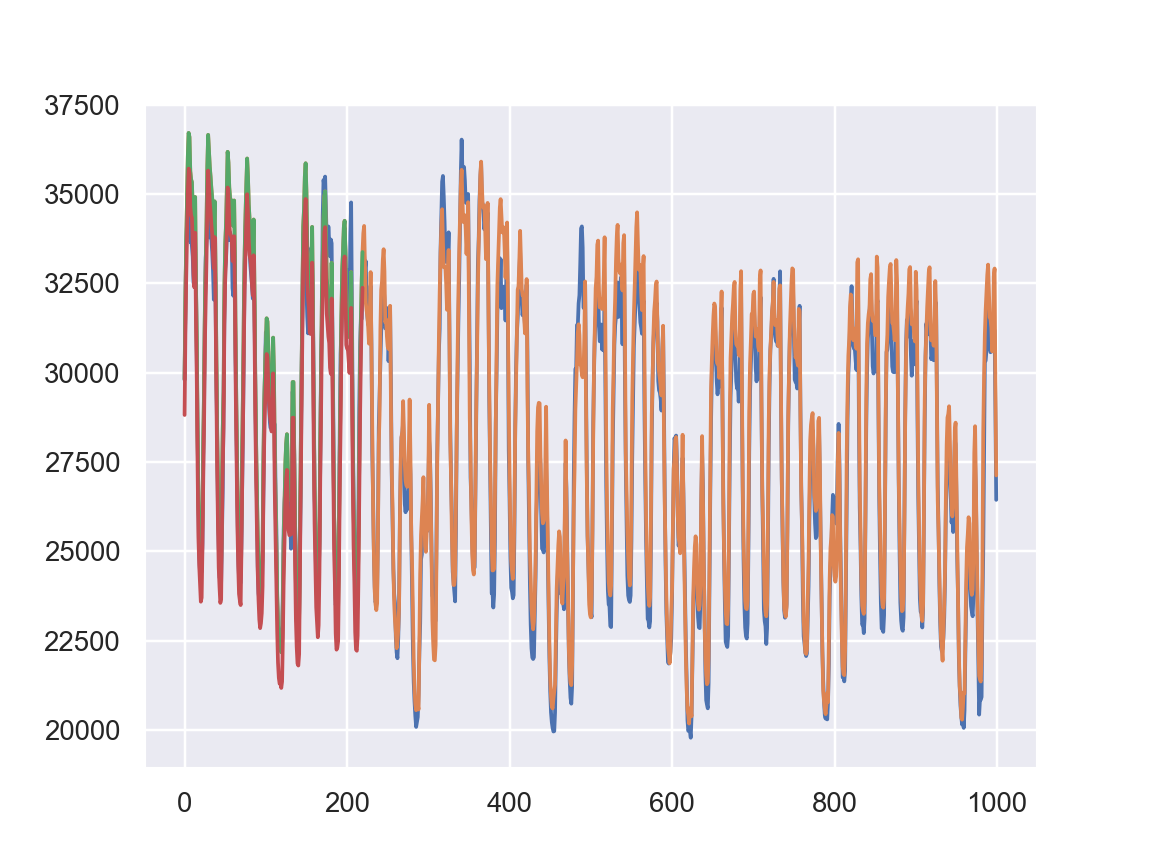

In [131]:
plt.plot(test_preds[:1000])
plt.plot(y_test.to_numpy()[:1000])

<IPython.core.display.Javascript object>


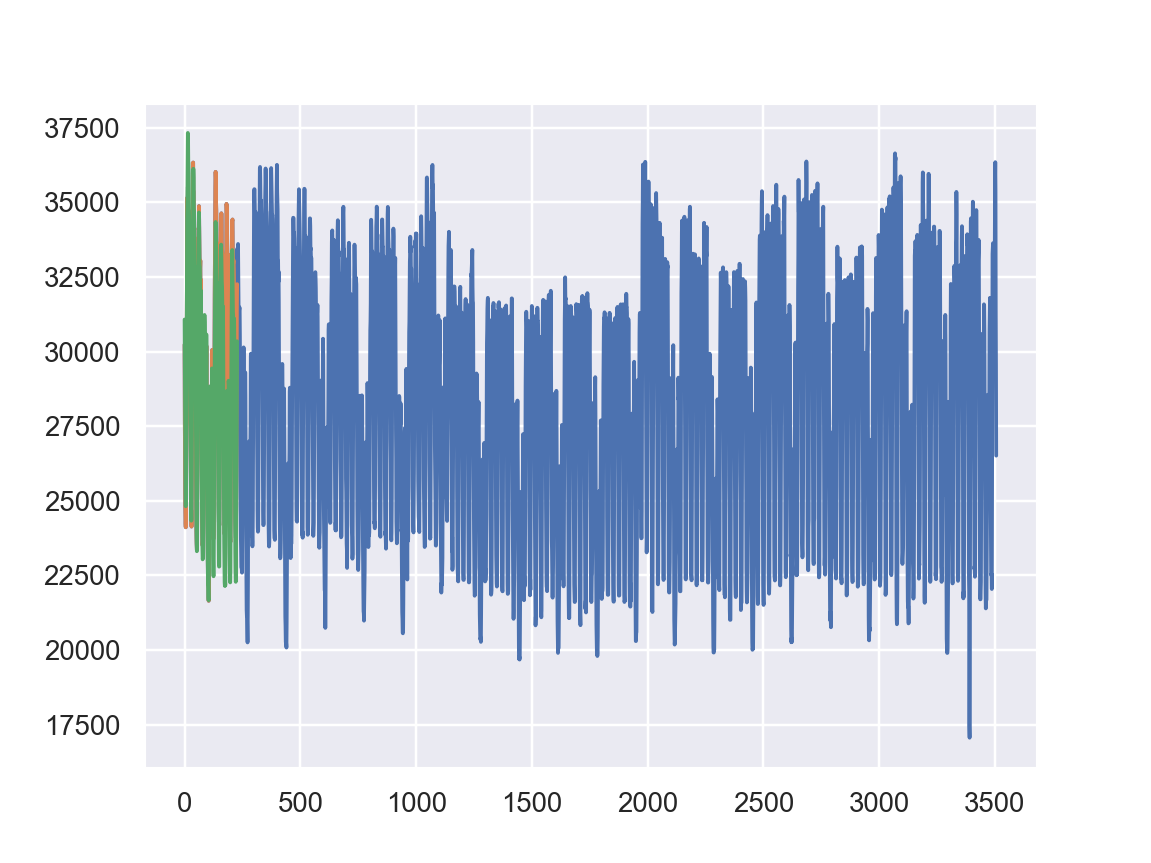

In [30]:
plt.figure()
plt.plot(test_preds)

In [42]:
dtrain = DMatrix(X, label=y)

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    # 'objective':'reg:linear',
}

cv_results = cv(
    params,
    dtrain,
    num_boost_round=999,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,20054.254687,8.332968,20053.659766,37.903076
1,14045.319727,5.477629,14045.809570,33.064864
2,9839.435742,4.102206,9840.507227,24.973668
3,6908.672949,2.544082,6912.009277,21.503576
4,4883.484375,2.277332,4889.534180,17.110941
...,...,...,...,...
911,72.269350,0.723414,630.301746,6.364144
912,72.136642,0.734580,630.270618,6.373748
913,71.980199,0.758214,630.237940,6.358310
914,71.809811,0.788976,630.202307,6.345684


In [51]:
# random search linear regression model on the auto insurance dataset
from scipy.stats import loguniform
from pandas import read_csv

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
# load dataset



# define model
n_estimators = 999
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'learning_rate':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    # 'objective':'reg:linear',
}
model = XGBRegressor(
    **params,
    n_estimators=n_estimators)
# fit = xgb_model.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_train, y_train), (X_test, y_test)],
#     early_stopping_rounds=20)



# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['max_depth'] = [5, 10, 20, 50, 100]
space['learning_rate'] = loguniform(1e-5, 1e-2)
# space['fit_intercept'] = [True, False]
# space['normalize'] = [True, False]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y, verbose=True)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

KeyboardInterrupt: 

In [41]:
# CROSSVAL

from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
xgb = XGBRegressor()

score = -1 * cross_val_score(xgb, X, y, cv=kfold, scoring='neg_mean_squared_error').mean()

score

1131763.5322154402

In [ ]:
xgb_model.feature_importances_

In [ ]:
%matplotlib notebook

plt.bar(X_train.columns, xgb_model.feature_importances_)
plt.xticks(rotation=90)